SoPI II : Herramientas de teledeteccion cuantitativas
=====================================================

Introduccion
------------

Dentro del curso usaremos distintas herramientas de python junto con el software [SoPI](http://sopi.conae.gov.ar) de la [CONAE](http://www.conae.gov.ar).

El notebook contara con pequeñas explicaciones sobre el proceso realizado junto con el codigo a ejecutar.

Cada seccion del documento estara asociada a una seccion de la guia de actividades o preguntas en caso de ser necesario.

### Librerias adicionales

Dentro de python utilizaremos distintas herramientas para procesar imagenes

- [numpy](http://www.numpy.org/) para el procesamiento numerico y matricial.
- [scipy](http://scipy.org/) para calculos estadisticos.
- [gdal](http://www.gdal.org/) para manipulacion de imagenes.
- [matplotlib](http://matplotlib.org/) para generacion de graficos.
- [sklearn](http://scikit-learn.org/) para procesos de machine learning.
- [datetime](https://pymotw.com/2/datetime/) para manejar las fechas.
- [random]() para elegir valores al azar.

In [44]:
#Importo las librerias necesarias
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import gdal
import datetime
import random
# Importo las herramientas de interpolacion e integracions
from scipy import interpolate
from scipy import integrate
from scipy import stats
from matplotlib import dates
from matplotlib import cm
# Ignoro ciertos warnings
np.seterr(invalid='ignore');
# Configuro los graficos como inline
%matplotlib inline

1. Analisis de Firmas Espectrales
---------------------------------

Dentro de los objetivos de esta practica se encuentra graficar firmas espectrales. Las siguientes funciones de python lo ayudaran en ese sentido.

### 1.1.3. Utilizando la herramienta...

Se pretende en esta seccion graficar firmas espectrales. Dividiremos a la misma en dos. 

1. Graficar las firmas medidas con SoPI sin una firma de fondo.
2. Graficar las firmas medidas con SoPI con una firma de fondo.

#### 1.1.3.A. Grafico sin firmas de fondo

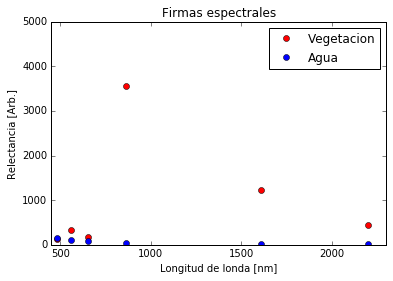

In [2]:
# Cargo y grafico los puntos de la imagen. 
# Valores de longitud de onda para landsat 8
x = [482,561,655,864,1608,2200]

# Repitiendo estas dos lineas se pueden graficar varios puntos
r1 = [128,329,185,3568,1219,442]
plt.plot(x,r1,'o', color="red", label="Vegetacion")
r2 = [150,100,75,50,25,25]
plt.plot(x,r2,'o', color="blue", label="Agua")

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesto
# Pongo el limite en x e y
plt.xlim(450,2300)
plt.ylim(0,5000)
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firmas espectrales")
# Muestro el grafico
plt.show()

#### 1.1.3.B. Grafico con firmas de fondo

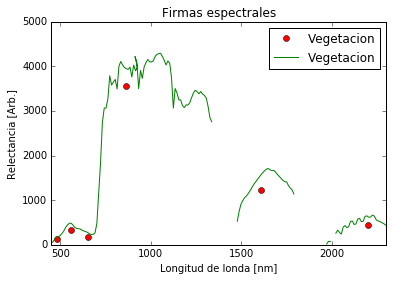

In [3]:
# Valores de longitud de onda para landsat 8
x = [482,561,655,864,1608,2200]

# Repitiendo estas dos lineas se pueden graficar varios puntos
r1 = [128,329,185,3568,1219,442]
plt.plot(x,r1,'o', color="red", label="Vegetacion")

# Nombre del archivo con la firma espectral a utilizar
firma_in = "../material/firmas/A12_1.txt"

# Lectura de la firma espectral
# skip_header se usa para saltear el header del archivo
firma = np.genfromtxt(firma_in,skip_header=7)
# Busco los valores cero
mask = firma[:,3]<=0
# Los enmascaro como nan
firma[mask]=np.nan

# Grafico la reflectancia contra la longitud de onda
plt.plot(firma[:,0],firma[:,3], label="Vegetacion", color="green")

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesto
# Pongo el limite en x e y
plt.xlim(450,2300)
plt.ylim(0,5000)
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Longitud de londa [nm]")
plt.ylabel("Relectancia [Arb.]")
# Pongo titulo
plt.title("Firmas espectrales")
# Muestro el grafico
plt.show()

2. Correcion Radiometrica de Imagenes Satelitales
-------------------------------------------------

Dentro de los objetivos de esta practica se encuentra abrir imagenes y calcular histogramas sobre las mismas.

### 2.1.3 Grafique el histograma...

Se pretende en esta seccion graficar el histograma para todas las bandas de la imagen seleccionada para poder asi calcular el valor minimo de las mismas

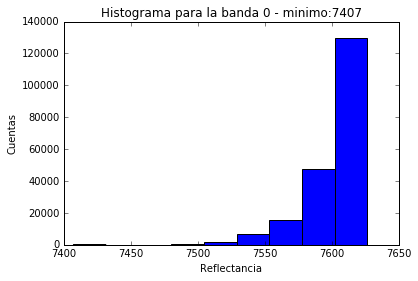

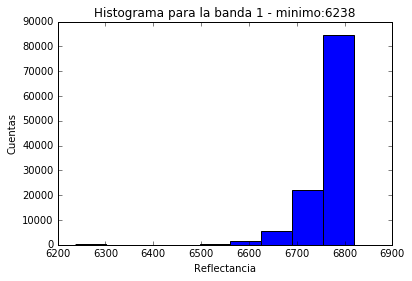

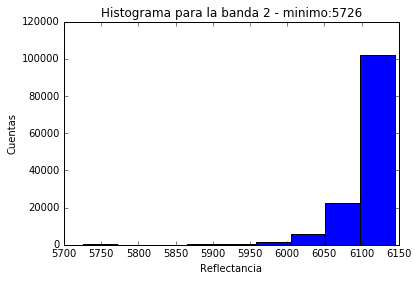

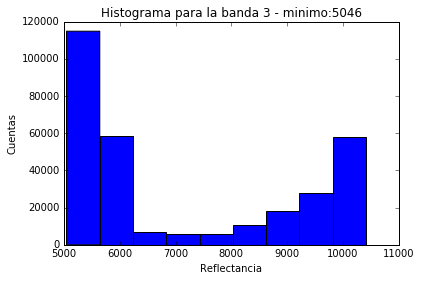

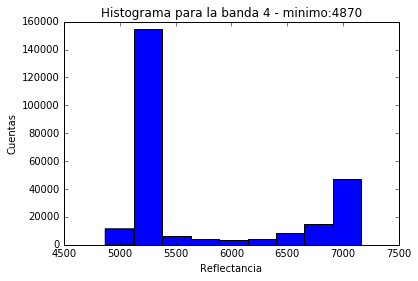

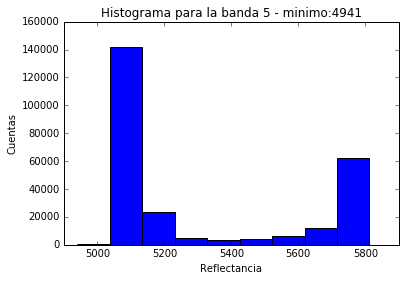

In [4]:
# Nombre de la imagen
imagen_in = "../material/imagenes/l1_l8_oli_20130819.tif"

# cargo la imagen como un handle
imagen_ha = gdal.Open(imagen_in)
# Leo la cantidad de filas y columnas
Nx = imagen_ha.RasterXSize
Ny = imagen_ha.RasterYSize
N  = imagen_ha.RasterCount
# Creo el array de con el numero de bandas elementos vacios
imagen = [[]]*N
# Leo la banda como array
for i in range(N):
    imagen[i] = imagen_ha.GetRasterBand(i+1).ReadAsArray()
# Calculo los histogramas por banda
for i in range(N):
    # Reshapeo el array para hacerlo mas rapido
    imagen[i].shape = Nx*Ny
    # Busco el minimo y el maximo fijando el paso
    mi = np.min(imagen[i])
    ma = np.percentile(imagen[i],10)
    step = (ma-mi)/10
    #Grafico el histograma y lo muestro
    plt.hist(imagen[i],bins=np.arange(mi,ma,step))
    plt.xlabel('Reflectancia')
    plt.ylabel('Cuentas')
    plt.title('Histograma para la banda '+str(i)+" - minimo:"+str(mi))
    plt.show()

### 3. Correcion Radiometrica de Imagenes Satelitales
-------------------------------------------------

Dentro de los objetivos de esta practica se graficar series temporales de indices y scatterplots de bandas

### 2.1.3 Abra la imagen...

Se pretende en esta seccion grafica el indice de vegetacion como funcion del tiempo.

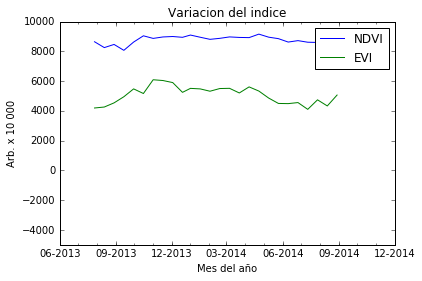

In [5]:
# Valores obtenidos para el NDVI
NDVI = [8646,8253,8465,8069,8625,9045,8871,8968,8998,8944,
       9096,8949,8808,8875,8971,8936,8924,9158,8954,8854,
       8625,8721,8614,8599,8056,8654]
EVI  = [4194,4259,4539,4950,5479,5167,6092,6040,5902,5245,
        5513,5477,5321,5501,5516,5204,5612,5332,4863,4500,
       4488,4558,4103,4743,4332,5064]
NDVI_label = "NDVI" #Etiqueta del NDVI
EVI_label = "EVI" #Etiqueta del EVI

# Valores de dias donde se adquirieron las imagenes
# Creo el vector de dias para graficar
dias = []
# Separacion entre dias
delta = datetime.timedelta(days=16)
# Agrego los dias de 2013
init1 = datetime.date(2013, 7, 28)
end1 = datetime.date(2013,12,20)
# Agrego los dias de 2014
dias.extend(dates.drange(init1,end1,delta))
init2 = datetime.date(2014, 1, 1)
end2 = datetime.date(2014,8,30)
dias.extend(dates.drange(init2,end2,delta))
# Creo el grafico con las figuras
fig, ax= plt.subplots()
plt.plot(dias,NDVI,label=NDVI_label)
plt.plot(dias,EVI,label=EVI_label)

# Configuraciones de ploteo. 
# Cambiar bajo su propio riesto
# Configure las divisiones
mayor = dates.MonthLocator(interval=3)  # cada 3 meses
menor = dates.MonthLocator()            # cada 1 meses
formato = dates.DateFormatter('%m-%Y')  # formato de fechas
# format the ticks
ax.xaxis.set_major_locator(mayor)
ax.xaxis.set_major_formatter(formato)
ax.xaxis.set_minor_locator(menor)
datemin = datetime.date(2013, 6, 1)
datemax = datetime.date(2014, 12, 1)
# Pongo los limites a las fechas
ax.set_xlim(datemin, datemax)
# Configure el eje y
plt.ylim(-5000,10000)
# Incluyo la leyenda
plt.legend(numpoints=1)
# Pongo nombres a los ejes
plt.xlabel("Mes del año")
plt.ylabel("Arb. x 10 000")
# Pongo titulo
plt.title("Variacion del indice")
# Muestro el grafico
plt.show()

### 2.1.4 Estime la pendiente...
Se pretende en esta seccion estimar y graficar la linea de suelo en un scatterplot NIR-ROJO

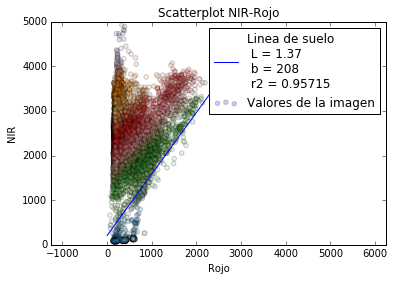

In [12]:
# Nombre de la imagen
imagen_in = "../material/imagenes/l8_oli_20130819.tif"

# Numero de puntos para hacer el scatterplot
Nd = 20000

# cargo la imagen como un handle
imagen_ha = gdal.Open(imagen_in)
# Leo la cantidad de filas y columnas
Nx = imagen_ha.RasterXSize
Ny = imagen_ha.RasterYSize
N  = imagen_ha.RasterCount
# Leo las bandas 3 y 4 a dos arrays
rojo = imagen_ha.GetRasterBand(3).ReadAsArray()
nir = imagen_ha.GetRasterBand(4).ReadAsArray()
# Convierto los arrays a 1D
rojo.shape = Nx*Ny
nir.shape = Nx*Ny

# Creo dos vectores con los puntos entre los percentiles
# upper y lower. Despues ajusto dichos puntos por regresion
# lineal para obtener los valores de L y b para
# la linea de suelo.
# Percentil inferior y superior
upper = 8
lower = 1
lamin = 1000 # Longitud de onda minima
# Vectores a usar
rojo2 = []
nir2 = []
# Itero para todas las longitudes de onda
for i in range(2000):
    idx = rojo==i+lamin
    if len(nir[idx])>100: #cantidad minima de datos para considerar la fila
        # Me quedo solo con los valores que complen estar en el percentil mas bajo
        idx2 = (nir[idx] < np.percentile(nir[idx],upper))& (nir[idx] > np.percentile(nir[idx],lower))
        rojo2.extend(rojo[idx][idx2])
        nir2.extend(nir[idx][idx2])
# Hago la regresion lineal
L = sp.stats.linregress(x=rojo2,y=nir2)

# Muestreo valores para hacer el scatterplot mas rapido
idx=random.sample(range(len(nir)),Nd)
# Grafico el scatterplot coloreando distinto en la direccion de N-R
plt.scatter(rojo[idx],nir[idx],c=(nir[idx]-rojo[idx]),alpha=0.2, cmap=cm.Paired,label='Valores de la imagen')
# Grafico la linea de suelo
x = np.arange(0,3000,10)
y = L[0]*x+L[1]
plt.plot(x,y,label='Linea de suelo\n L = '+str(int(1e2*L[0])/1e2)+
         '\n b = '+str(int(L[1]))+'\n r2 = '+str(str(int(1e5*L[2])/1e5)))
plt.legend(numpoints=1)
# Pongo el limite en x e y fijo la relacion de aspecto en 1
plt.axis('equal')
plt.axis([0, 5000, 0, 5000])
# Pongo nombres a los ejes
plt.xlabel("Rojo")
plt.ylabel("NIR")
# Pongo titulo
plt.title("Scatterplot NIR-Rojo")
# Muestro el scatterplot
plt.show()

7. Validación de clasificaciones
--------------------------------

Dentro de los objetivos de esta practica es extraer informacion adicional a partir de la matriz de confusion y otros datos de la imagen

### 7.1.4 A partir de las matrices...

Calcularemos en este apartado informacion adicional obtenida de las matrices de confusion

In [39]:
# Cargo la matriz de confusion
matrix = np.array([
         [59, 20,  1,  2,  0,  0],
         [ 9, 91,  0,  0,  0,  0],
         [ 0,  2,  0,  0,  0,  1],
         [ 5,  1,  0,  0,  0,  0],
         [ 0,  0,  0,  0,  2,  0],
         [ 0,  0,  1,  0,  0,  5]])
# Cargo las areas en pixeles de cada region
areas = np.array([  972973.,  1844860.,    13368.,    36696.,    83516.,    45414.])
percent = areas/sum(areas)

# Convierto las areas a km^2
areas = areas*30*30/1e6

# Convierto la matriz de confusion a probabilidades
m = []
for i in range(len(matrix)):
    for j in range(len(matrix)):
        m.append(matrix[i,j]/sum(matrix[i,:])*percent[i])
m = np.array(m)
m.shape = (len(matrix),len(matrix))

# Calculo las areas y desvios para cada componente
area = []
desvio = []
for i in range(len(matrix)):
    area.append(sum(areas)*sum(m[:,i]))
    suma = 0
    for j in range(len(matrix)):
        suma = suma + (percent[j]*m[j,i]-m[j,i]**2)/(sum(matrix[i,:])-1)
    desvio.append(sum(areas)*np.sqrt(suma))
area = np.array(area)
desvio = np.array(desvio)
# Imprimo las areas y su error standar
print("   Area    Error")
print("  [km^2]   [km^2]")
print("-----------------")
for i in range(6):
    print('%8.2f %8.2f' % (area[i], 1.96*desvio[i]))

   Area    Error
  [km^2]   [km^2]
-----------------
  807.02   134.37
 1738.04   119.40
   17.49   134.87
   21.36   118.40
   75.16     0.00
   38.07    14.25
